# Climatology  
This notebook computes the climatology (monthly means) of surface temperature, salinity, and net primary production for the control run.

In [3]:
# Importing packages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import nc_time_axis



In [4]:
# Loading the Data and Separating it into TSS, SSS, and NPP files
rootdir = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/' 
           + 'ESM4_piControl_D/gfdl.ncrc4-intel18-prod-openmp/'+
           'pp/ocean_month/ts/monthly/5yr/ocean_month')
ds_tss = xr.open_mfdataset(rootdir+'*tos.nc')
ds_sss = xr.open_mfdataset(rootdir+'*sos.nc')
ds_npp = xr.open_mfdataset(rootdir+'*MLD_003.nc')


In [5]:
gridpath = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/GRID/ocean.static.nc')
grid = xr.open_dataset(gridpath)

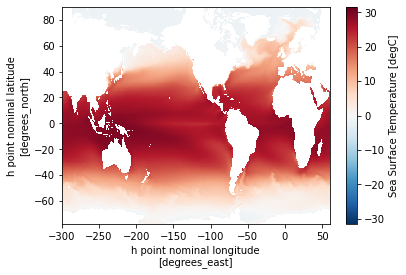

In [6]:
#month is 0 indexed, returns the average over 300 years for a particular month
def month_average(ds,month):
    month_ds = ds.isel(time=slice(month,3600,12))
    mean = month_ds.mean(dim='time',keep_attrs=True)
    return mean

jan_tss = month_average(ds_tss,0)
jan_tss['tos'].plot()

In [7]:
# returns a dataset containing all the control data for a particular month
def month_ds(ds,month):
    return ds.isel(time=slice(month,3600,12))

#do groupby
jan_ds = month_ds(ds_tss,0)
feb_ds = month_ds(ds_tss,1)

In [8]:
#returns a 0-indexed list of all monthly averages
def month_averages(ds):
    averages = [*range(12)]
    for month in range(12):
        averages[month] = month_average(ds, month)
    return averages
        

In [9]:
# returns the standard deviation for a particular month
def month_std(ds, month):
    month = month_ds(ds, month)
    std = month.std(dim='time',keep_attrs=True)
    return std


In [31]:
# returns the standard deviation for all months in a 0-indexed list
def allmonth_std(ds):
    stds = [*range(12)]
    for month in range(12):
        stds[month] = month_std(ds, month)
    return stds

def allmonth_var(ds):
    vars = [*range(12)]
    for month in range(12):
        std = month_std(ds, month)
        vars[month] = std ** 2
    return vars


In [32]:
monthly_stddev = allmonth_var(ds_tss)

In [11]:
#monthly_stddev = allmonth_std(ds_tss)

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


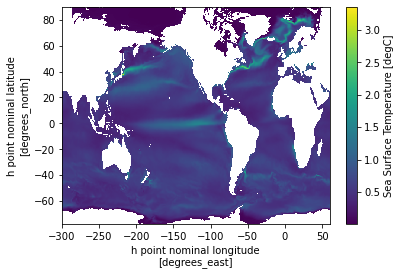

In [12]:
monthly_stddev[3]['tos'].plot()

In [13]:
# start_yrs = ['0123','0161','0185','0208','0230','0269','0300','0326','0359','0381']
# members = [*range(9)]
# ensembles = np.arange(90).reshape((10, 9))
# da_ensembles = xr.DataArray(ensembles, dims=['start','member'], coords={'start': start_yrs, 'member': members})
# da_ensembles.sel(member=0)

In [14]:
# for start_year in range(10):
#     for mem in range(9):
#         folder = 'ESM4_piControl_D-ensemble-' + start_yrs[start_year] + '0101-0' + str(mem + 1)
#         print(folder)
#         path = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/' 
#                 + folder + '/gfdl.ncrc4-intel18-prod-openmp/'+'pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc')
#         data = xr.open_mfdataset(path)
#         da_ensembles[start=start_year, member=mem] = data
        

In [15]:
#finds the average across all ensemble members for a particular start year
def ensemble_avg(start_year):
    path_init = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/' +
                'ESM4_piControl_D-ensemble-' + start_year + '0101-01' + '/gfdl.ncrc4-intel18-prod-openmp/'+'pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc')
    sum = xr.open_mfdataset(path_init)
    for member in range(1,9):
        folder = 'ESM4_piControl_D-ensemble-' + start_year + '0101-0' + str(member + 1)
        print(folder)
        path = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/' 
                + folder + '/gfdl.ncrc4-intel18-prod-openmp/'+'pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc')
        ds = xr.open_mfdataset(path)
        sum = sum + ds
    avg = sum / 9
    return avg


In [16]:
#testing avg method above
ens3avg = ensemble_avg('0208')

ESM4_piControl_D-ensemble-02080101-02
ESM4_piControl_D-ensemble-02080101-03
ESM4_piControl_D-ensemble-02080101-04
ESM4_piControl_D-ensemble-02080101-05
ESM4_piControl_D-ensemble-02080101-06
ESM4_piControl_D-ensemble-02080101-07
ESM4_piControl_D-ensemble-02080101-08
ESM4_piControl_D-ensemble-02080101-09


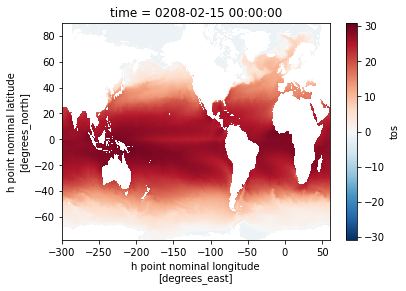

In [17]:
ens3avg['tos'].isel(time=1).plot()

In [18]:
def ensemble_stddev(start_year):
    
    #first, let's get the average of the ensemble
    avg = ensemble_avg(start_year)
    path_init = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/' +
                'ESM4_piControl_D-ensemble-' + start_year + '0101-01' + '/gfdl.ncrc4-intel18-prod-openmp/'+'pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc')
    ds_init = xr.open_mfdataset(path_init)
    sum_sqr = (ds_init-avg)**2
    for member in range(1,9):
        folder = 'ESM4_piControl_D-ensemble-' + start_year + '0101-0' + str(member + 1)
        print(folder)
        path = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/' 
                + folder + '/gfdl.ncrc4-intel18-prod-openmp/'+'pp/ocean_month/ts/monthly/5yr/ocean_month.*tos.nc')
        ds = xr.open_mfdataset(path)
        sum_sqr = sum_sqr + (ds-avg)**2
    sum_sqr = sum_sqr / 9
    return sum_sqr

ens3_stddev = ensemble_stddev('0208')

ESM4_piControl_D-ensemble-02080101-02
ESM4_piControl_D-ensemble-02080101-03
ESM4_piControl_D-ensemble-02080101-04
ESM4_piControl_D-ensemble-02080101-05
ESM4_piControl_D-ensemble-02080101-06
ESM4_piControl_D-ensemble-02080101-07
ESM4_piControl_D-ensemble-02080101-08
ESM4_piControl_D-ensemble-02080101-09
ESM4_piControl_D-ensemble-02080101-02
ESM4_piControl_D-ensemble-02080101-03
ESM4_piControl_D-ensemble-02080101-04
ESM4_piControl_D-ensemble-02080101-05
ESM4_piControl_D-ensemble-02080101-06
ESM4_piControl_D-ensemble-02080101-07
ESM4_piControl_D-ensemble-02080101-08
ESM4_piControl_D-ensemble-02080101-09


<xarray.Dataset>
Dimensions:    (xh: 720, yh: 576, time: 120, nv: 2, xq: 720, yq: 576, zl: 75)
Coordinates:
  * xh         (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh         (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time       (time) object 0208-01-16 12:00:00 ... 0217-12-16 12:00:00
  * nv         (nv) float64 1.0 2.0
  * xq         (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 58.5 59.0 59.5 60.0
  * yq         (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.58 89.79 90.0
  * zl         (zl) float64 1.0 3.0 5.0 7.0 ... 3.338e+03 3.591e+03 5.111e+03
Data variables:
    tos        (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    time_bnds  (time, nv) object dask.array<chunksize=(60, 2), meta=np.ndarray>

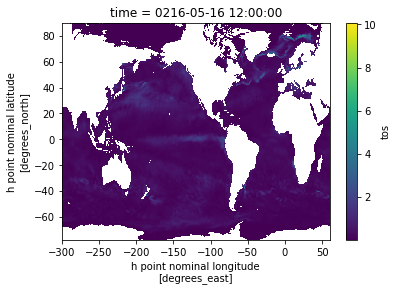

In [19]:
ens3_stddev['tos'].isel(time=100).plot()
ens3_stddev

In [20]:
ens3_std_globalmean = ens3_stddev['tos'].weighted(grid['areacello']).mean(['xh','yh'])


In [21]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    ens3_std_globalmean = ens3_std_globalmean.compute()

[########################################] | 100% Completed |  3.3s


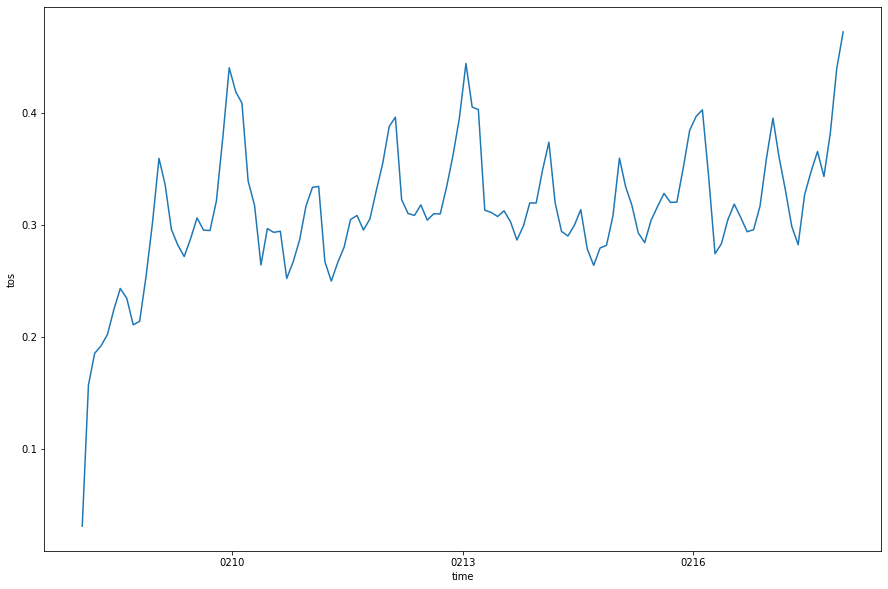

In [22]:
ens3_std_globalmean.plot(size=10)

In [33]:
control_mean = [*range(12)]
for month in range (12):
    control_mean[month] = monthly_stddev[month]['tos'].weighted(grid['areacello']).mean(['xh','yh'])
    with ProgressBar():
        control_mean[month] = control_mean[month].compute()


[########################################] | 100% Completed | 12.0s
[                                        ] | 0% Completed |  0.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  8.8s
[                                        ] | 0% Completed |  0.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  5.6s
[                                        ] | 0% Completed |  0.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4.6s
[                                        ] | 0% Completed |  0.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  2.7s
[                                        ] | 0% Completed |  0.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  6.3s
[                                        ] | 0% Completed |  0.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4.6s
[                                        ] | 1% Completed |  0.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4.8s
[                                        ] | 0% Completed |  0.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4.7s
[                                        ] | 0% Completed |  0.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  2.9s
[                                        ] | 0% Completed |  0.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  6.3s
[                                        ] | 2% Completed |  0.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  2.6s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [24]:
simple = ens3_std_globalmean / control_mean[1]
simpleppp = 1 - simple

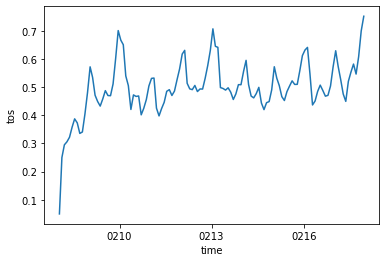

In [25]:
simple.plot()

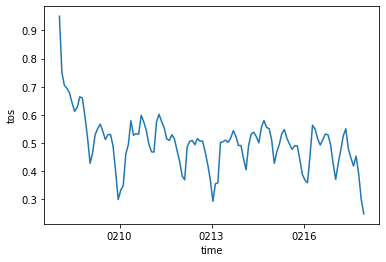

In [26]:
simpleppp.plot()

In [34]:
ppp = [*range(120)]
for t in range(120):
    ppp[t] = 1 - (ens3_std_globalmean.isel(time=t) / control_mean[t%12])

#check out .repeat() for numpy - consider repeating the control mean 

In [1]:
plt.plot(ppp, color='r',mfc='pink' )
plt.title('PPP of SST, Ensemble Start Year 208')
plt.xlabel('Time (Months after Initialization)')
plt.ylabel('PPP of SST')
plt.savefig('PPP of SST, Ensemble Start Year 208')

NameError: name 'plt' is not defined

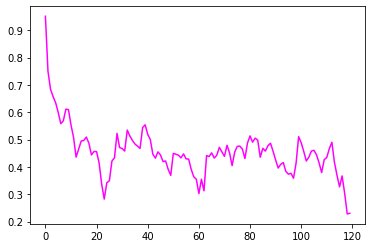

In [28]:
plt.plot(ppp, color='magenta',mfc='pink' )